In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

In [13]:
def deutsch_function(case: int):
    # This function generates a quantum circuit for one of the 4 functions
    # from one bit to one bit

    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
        
    return f

In [19]:
def compile_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in Deutsch's algorithm.

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.h(0)

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(0)
    qc.measure(range(n), range(n))

    return qc

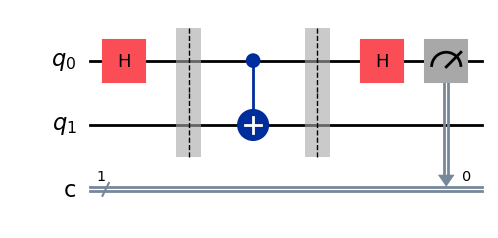

In [17]:
display(compile_circuit(deutsch_function(2)).draw(output="mpl"))

In [22]:
simulator = AerSimulator()
circuit = compile_circuit(deutsch_function(4))
result = simulator.run(circuit).result()
counts = result.get_counts()
total_shots = sum(counts.values())
probabilities = {k: v / total_shots for k, v in counts.items()}
print(probabilities)

{'0': 1.0}


In [28]:
r = 1
n = 13
N = 231

temp = n
while temp != 1:
    r += 1
    temp *= n
    temp %= N

    print(temp)

print(f"r = {r}, n = {n}, N = {N}")

169
118
148
76
64
139
190
160
1
r = 10, n = 13, N = 231


In [ ]:
a = 3
N = 12155
r = 240

x = (a**(r // 2) - 1) % N

print(f"x = {x}")

from math import gcd

d = gcd(x, N)

print(f"gcd({x}, {N}) = {d}")

x = 10725
gcd(10725, 12155) = 715
